# Python VaR jupyter notebook

Allows calculation of **historical VaR** for a variable range of user defined US equities. The lookback period is manually user defined. 

In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from matplotlib import style

## User defined inputs below
**tickers** is a user defined list containing the ticker symbols to be downloaded
**start_date** defines the beginning of the lookback period for the historical VaR calculation
**var_level** defines the quantile. For example, a VaR95 would have a var_level of 5
**auth_token** defines your quandl API key, this is necessary for downloading the relevant stock data from quandl

In [11]:
tickers = ["aapl", "tsla", "goog", "amzn", "fb"]
start_date = "2017-01-01"
var_level = 5
auth_token = "your quandl API key here"

In [12]:
#Importing data and correctly formatting the dataframe
######################################################
def get_data(tickers,start_date):
    
    #Importing data from quandl
    quandl.ApiConfig.api_key = auth_token
    df = quandl.get_table('WIKI/PRICES', 
                          ticker=tickers,
                          qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                          date = { 'gte': start_date}, 
                          paginate = True)

    #Reformatting the dataframe and calculating returns
    df = df.pivot_table(index='date', columns='ticker', values='adj_close', aggfunc='sum')
    for column in df:
        df[column] = df[column].pct_change()
    df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

    return df

In [13]:
#Function for computing single asset historical VaR for each asset present in a dataframe
def get_single_asset_var(df,var_level):
    for column in df:
        sorted_returns = sorted(df[column])
   
        var_result = np.percentile(sorted_returns, var_level)
    
        #Output histogram
        plt.hist(sorted_returns,normed=True)
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.title(r'Histogram of Asset Returns', fontsize=18, fontweight='bold')
        plt.axvline(x=var_result, color='r', linestyle='--', label='95% Confidence VaR: ' + "{0:.2f}%".format(var_result * 100))
        plt.legend(loc='upper right', fontsize = 'x-small')
        plt.show()  
        print(column)
        print(var_result)
    

In [14]:
#Function for generating a correlation matrix for several assets contained in a dataframe
def get_correlation_matrix(df):
    global portfolio_correlation_matrix
    portfolio_correlation_matrix = df.corr()
    
    plt.matshow(df.corr())
    plt.show()
    return portfolio_correlation_matrix

In [15]:
df = get_data(tickers,start_date)
df.head()

ticker,AAPL,AMZN,FB,GOOG,TSLA
date,,,,,
2017-01-04,-0.001119,0.004657,0.015660,0.000967,0.046085
2017-01-05,0.005085,0.030732,0.016682,0.009048,-0.001057
2017-01-06,0.011148,0.019912,0.022707,0.015277,0.009967
2017-01-09,0.009160,0.001168,0.012074,0.000620,0.009912
2017-01-10,0.001008,-0.001280,-0.004404,-0.002306,-0.006097


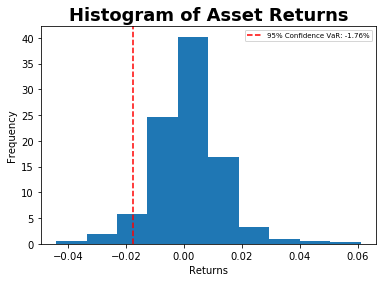

AAPL
-0.0175664879346


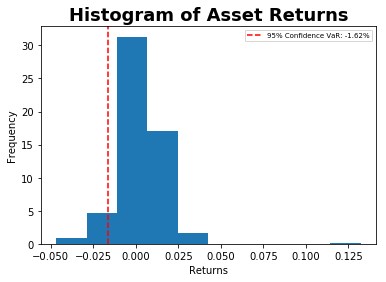

AMZN
-0.0161928244393


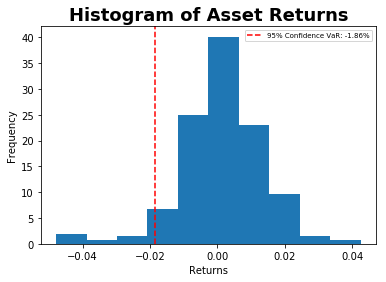

FB
-0.0185872662247


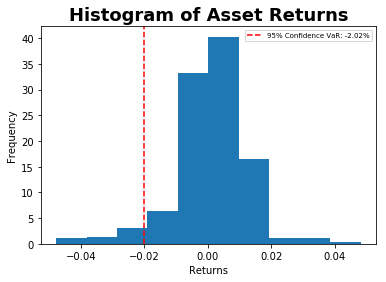

GOOG
-0.0201598108028


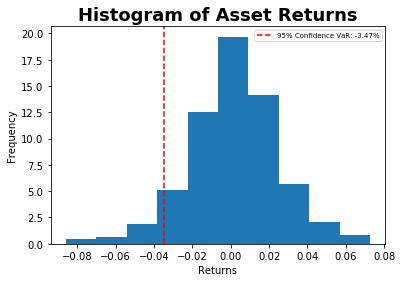

TSLA
-0.0347304239166


In [16]:
get_single_asset_var(df,var_level)

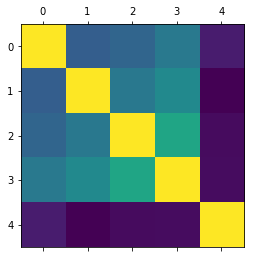

ticker,AAPL,AMZN,FB,GOOG,TSLA
ticker,,,,,
AAPL,1.000000,0.473742,0.493233,0.551452,0.306193
AMZN,0.473742,1.000000,0.549617,0.604353,0.247711
FB,0.493233,0.549617,1.000000,0.691376,0.268537
GOOG,0.551452,0.604353,0.691376,1.000000,0.272385
TSLA,0.306193,0.247711,0.268537,0.272385,1.000000


In [17]:
get_correlation_matrix(df)